In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("fake_news/fakenews.csv")

In [13]:
data2=pd.read_csv("fake_news/label_for_fakeness.csv")

In [14]:
data2.head(2)

,id,label
0,20800,0
1,20801,1


In [15]:
data.head(2)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...


In [16]:

data3=pd.merge(data,data2, on="id")

In [17]:
data3.head(2)

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1


In [24]:
# df1=pd.DataFrame({
#     "city":["america", "aurangabad", "agra"],
#     "temp":["12","34","90"],
# })
# df2=pd.DataFrame({
#     "city":["america", "aurangabad", "agra"],
#     "humidity":["120","134","590"],
# })
# df3=pd.merge(df1,df2, on="city")
# df3

In [18]:
new_data=data3.dropna()

In [20]:
# new_data.head(10)

In [21]:
new_data.reset_index(inplace=True)

In [23]:
# new_data.head(10)

In [24]:
X=new_data.drop("label", axis=1)
X.head(2)

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...


In [25]:
data3.head(2)

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1


In [28]:
messages=X.copy()

In [43]:
messages.head(15)

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
5,7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
6,10,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...
7,11,20811,“Working Class Hero” by John Brennon,Doug Diamond,"Source: CNBC, article by Robert Ferris Arctic ..."
8,12,20812,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley,Written by Shaun Bradley Mandatory vaccinati...
9,13,20813,Communists Terrorize Small Business,Steve Watson,Store Communists Terrorize Small Business The ...


In [31]:
messages.shape

(4575, 5)

In [32]:
#okay now we have the independed data i.e. X, and the dependent data i.e. labels
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

In [33]:
#cleaning
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [34]:
wnl= WordNetLemmatizer()
ps=PorterStemmer()

In [44]:
meaningful_words=[]
for i in range(len(messages)):
    title=re.sub('[^a-zA-Z]'," ", messages["title"][i])
    title=title.lower()
    title=title.split()
    title=[wnl.lemmatize(word) for word in title if not word in stopwords.words("english")]
    title=" ".join(title)
    meaningful_words.append(title)


In [45]:
meaningful_words[2]

'tim tebow attempt another comeback time baseball new york time'

In [68]:
#now, here, i'll do itusing bag of words, maybe tfidf haha
# cv=CountVectorizer(max_features=5000, ngram_range=(1,3))
# X=cv.fit_transform(meaningful_words).toarray()
# X.shape
tfi=TfidfVectorizer(max_features=10000, ngram_range=(1,3))
X=tfi.fit_transform(meaningful_words).toarray()
X.shape

(4575, 10000)

In [69]:
y=data3["label"][:4575]
y.shape

(4575,)

In [70]:
#prepare data using train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=0 )

In [173]:
# cv.get_params()

In [71]:
tfi.get_feature_names()[:10]

['aaron',
 'aaron hernandez',
 'abandoning',
 'abbas',
 'abby',
 'abby martin',
 'abby martin expose',
 'abc',
 'abc news',
 'abe']

In [72]:
final=pd.DataFrame(x_train, columns=tfi.get_feature_names())
final.head(2)

,aaron,aaron hernandez,abandoning,abbas,abby,abby martin,abby martin expose,abc,abc news,abe,...,zika,zika new,zika new york,zika virus,zimbabwe,zone,zone new,zone new york,zuckerberg,zum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [74]:
#the whole code for confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
#now we gon classify this shit up
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [76]:
classifier.fit(x_train, y_train)
prediction=classifier.predict(x_test)


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
accuracy=accuracy_score(prediction, y_test)
accuracy*100

51.78807947019868

Confusion matrix, without normalization


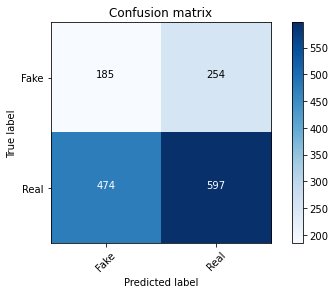

In [79]:
cm=confusion_matrix(prediction, y_test)
plot_confusion_matrix(cm, classes=["Fake", "Real"])


In [60]:
cm

array([[220, 296],
       [439, 555]], dtype=int64)

# passive aggressive classifier


In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier


accuracy : 0.500
Confusion matrix, without normalization


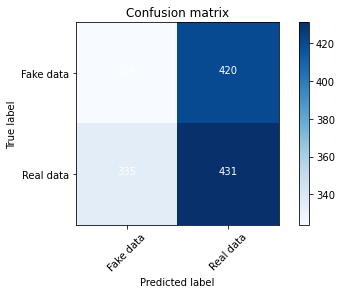

In [62]:
new_classifier=PassiveAggressiveClassifier(n_iter_no_change=50)
new_classifier.fit(x_train, y_train)
predict=new_classifier.predict(x_test)
accuracy=accuracy_score(predict, y_test)
print("accuracy : %0.3f" % accuracy)
cm=confusion_matrix(predict, y_test)
plot_confusion_matrix(cm, classes=["Fake data", "Real data"])



# multinomial classifier with hyperparameter

In [63]:
hyper_nb=MultinomialNB(alpha=0.1)

In [64]:
prev_score=0
for alpha in np.arange(3,4, 0.1):
    alt_hyper_nb=MultinomialNB(alpha=alpha)
    alt_hyper_nb.fit(x_train,y_train)
    y_predict=alt_hyper_nb.predict(x_test)
    score=accuracy_score(y_predict,y_test)
    if score>prev_score:
        hyper_nb=alt_hyper_nb
    print("alpha {} and accuracy is {}".format(alpha, score))

alpha 3.0 and accuracy is 0.528476821192053
alpha 3.1 and accuracy is 0.5278145695364238
alpha 3.2 and accuracy is 0.5298013245033113
alpha 3.3000000000000003 and accuracy is 0.5291390728476821
alpha 3.4000000000000004 and accuracy is 0.5271523178807948
alpha 3.5000000000000004 and accuracy is 0.5317880794701987
alpha 3.6000000000000005 and accuracy is 0.5344370860927152
alpha 3.7000000000000006 and accuracy is 0.5344370860927152
alpha 3.8000000000000007 and accuracy is 0.5390728476821192
alpha 3.900000000000001 and accuracy is 0.5390728476821192


In [65]:
get_features=tfi.get_feature_names()


In [66]:
hyper_nb.coef_[0]

array([-8.61358148, -8.48273697, -8.73049359, ..., -8.64193348,
       -8.4255388 , -8.73049359])

In [67]:
dono=list(zip(hyper_nb.coef_[0], get_features))[:20]
dono
#more negative, mo false biyach

[(-8.613581478519242, 'aaron'),
 (-8.48273696947096, 'abandoning'),
 (-8.730493588318481, 'abbas'),
 (-8.644849580808811, 'abby'),
 (-8.644849580808811, 'abby martin'),
 (-8.644849580808811, 'abby martin expose'),
 (-8.522623742840706, 'abc'),
 (-8.730493588318481, 'abe'),
 (-8.446535139013484, 'abedin'),
 (-8.730493588318481, 'abedin email'),
 (-8.327045728192981, 'abortion'),
 (-8.730493588318481, 'abrams'),
 (-8.421773942913331, 'abroad'),
 (-8.620335279502015, 'abroad new'),
 (-8.620335279502015, 'abroad new york'),
 (-8.369307167498315, 'absolutely'),
 (-8.31829541815912, 'abuse'),
 (-8.730493588318481, 'abuser'),
 (-8.730493588318481, 'academy'),
 (-8.598837892033746, 'accepts')]